In [23]:
#сначала надо запустить эту ячейку, она скачивает модель
import re
import gensim
import urllib.request
from gensim.models import word2vec

urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")




MemoryError: 

In [1]:
#потом надо запустить эту ячейку, она загружает модель в память
import re
import gensim
import urllib.request
from gensim.models import word2vec


m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

граф_S
[ 0.05708147  0.01706875  0.016187   -0.06108188 -0.05767746 -0.06176816
 -0.07714658 -0.03346457  0.04164116 -0.05193014]
графиня_S 0.6255611777305603
графа_S 0.562041163444519
фельдмаршал_S 0.5490690469741821
барон_S 0.5245657563209534
маркиз_S 0.4812353253364563
вице-канцлер_S 0.47963589429855347
радзивилла_S 0.47288811206817627
безбородко_ADV 0.46693024039268494
левенвольд_S 0.46604257822036743
суворов_S 0.4596206545829773


вельможа_S
[ 0.0217927   0.05060673  0.02792711 -0.02298131 -0.03979564 -0.01021632
 -0.00560393  0.02277238 -0.02200252 -0.05410132]
сановник_S 0.6264821887016296
боярин_S 0.593709409236908
придворный_S 0.5705909132957458
дворянин_S 0.5459882020950317
царедворец_S 0.5431396961212158
знать_S 0.5132420063018799
аристократ_S 0.5087881088256836
полководец_S 0.48413437604904175
царь_S 0.4813905656337738
правитель_S 0.48097673058509827


месье_S
[ 0.01942962 -0.02701444 -0.11548574 -0.02986694 -0.03913131 -0.01598209
 -0.09010141 -0.05577363  0.07628772 -0.07

центральные узла графа по degree centrality
гэтсби_S 0
могол_S 1
луки_S 2
визирь_S 3
князь_S 4
устюг_S 5
княгиня_S 6
воевода_S 7


центральные узла графа по betweenness centrality
княгиня_S 0
князь_S 1
графиня_S 2
граф_S 3
воевода_S 4
фельдмаршал_S 5
гэтсби_S 6
визирь_S 7


центральные узла графа по closeness centrality
князь_S 0
княгиня_S 1
гэтсби_S 2
могол_S 3
луки_S 4
визирь_S 5
графиня_S 6
устюг_S 7


центральные узла графа по eigen centrality
гэтсби_S 0
могол_S 1
луки_S 2
визирь_S 3
устюг_S 4
князь_S 5
княгиня_S 6
инквизитор_S 7


радиус графа
4
диаметр графа
7
Коэффициент ассортативности
0.08034260635662208
Плотность графа
0.1140819964349376
Коэффициент кластеризации
0.350492318139377


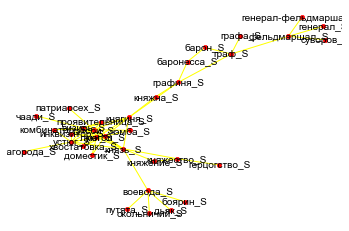

In [16]:
#в конце надо запустить эту ячейку, она делает всё остальное
import re
import gensim
import urllib.request
from gensim.models import word2vec
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')

G = nx.Graph()
words = ['граф_S', 'барон_S', 'князь_S'] #слова, на которых строится все семантическое поле

words_new = ['граф_S', 'барон_S', 'князь_S']

G.add_nodes_from(words)
for word in words:
    if word in model:
        for i in model.most_similar(positive=[word], topn=10):
            tag = re.search('_S$', i[0]) # проверяем, чтобы были только сущ
            if i[1] > 0.5 and tag is not None: # проверяем, чтобы коэф. кос. близости был больше 0.5
                words_new.append(i[0])
                G.add_node(i[0])
                G.add_edge(word, i[0])


for word in words_new:
    if word in model:
        for l in model.most_similar(positive=[word], topn=10):
            tag = re.search('_S$', l[0])
            if l[1] > 0.5 and tag is not None:
                G.add_node(l[0])
                G.add_edge(word, l[0])
    
deg = nx.degree_centrality(G)
i = 0
print("центральные узла графа по degree centrality")
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid, i)
    i = i + 1
    if i > 7:
        break
i = 0
print('\n')
print("центральные узла графа по betweenness centrality")
deg = nx.betweenness_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid, i)
    i = i + 1
    if i > 7:
        break
i = 0
print('\n')
print("центральные узла графа по closeness centrality")
deg = nx.closeness_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid, i)
    i = i + 1
    if i > 7:
        break
i = 0
print('\n')
print("центральные узла графа по eigen centrality")
deg = nx.eigenvector_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid, i)
    i = i + 1
    if i > 7:
        break
i = 0
print('\n')

print("радиус графа")
print(nx.radius(G))

print("диаметр графа")
print(nx.diameter(G))

print("Коэффициент ассортативности")
print(nx.degree_pearson_correlation_coefficient(G))

print("Плотность графа")
print(nx.density(G))
print("Коэффициент кластеризации")
print(nx.average_clustering(G))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = "red", node_size = 20)
nx.draw_networkx_edges(G, pos, edge_color = "yellow")
nx.draw_networkx_labels(G, pos, font_size = "10", font_family = "Arial")
plt.axis("off")
plt.savefig('test2png.png', dpi=500)
plt.show()
plt.close()